<a id="toc"></a>
<p><center style="color:#28838a; font-family: 'Dancing Script', cursive; font-size:25px;">Thanks for visiting my notebook </center></p>

<div style="background-color:#faf3cf; padding: 10px;">
<div class="alert alert-block alert-secondary" style="font-size:18px; font-family:verdana;">  Feel free to customize or fork the notebook to suit your needs. If you find it helpful, please consider giving it an upvote ⬆️. It helps others discover the notebook too! Your support motivates me to create more content like this</div>

<center><img  src="https://qph.cf2.quoracdn.net/main-qimg-1a521c9699b56c4c4dda4dff126976bd" alt="Image" width="200" height="150" > </center>

<div style="border-radius:3px; padding: 15px; background-color: #e6effa; font-size:110%; text-align:left">

<h3 align="left"><font color=#28838a>Problem Statement</font></h3>
    
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. 
    



## <b><span style='color:#fa762f'> | </span><span style='color:#28838a'> Import Libraries & Load Data </span></b>

In [ ]:
# https://www.kaggle.com/code/ddosad/travel-insurance-claims-cart-rf-ann#-%7C--Decision-Tree-

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/data-mining-insurance-claim/insurance_part2_data-2.csv")
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


## <b><span style='color:#fa762f'> | </span><span style='color:#28838a'> Exploratory Data Analysis </span></b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [4]:
print("Number of rows:", df.shape[0], "\nNumber of Columns",df.shape[1])

Number of rows: 3000 
Number of Columns 10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


<div style="border-radius:30px; padding: 15px; background-color: #e6effa; font-size:110%; text-align:left">

- The age group is relatively young, with an average age of 38.09 years old.
- There is a wide range of commission rates, with the lowest commission rate being 0% and the highest commission rate being 210.21%.
- The average duration is 70.01 minutes, but there is a wide range of durations, with the shortest lasting 1 minute and the longest lasting 4580 minutes.
- The average sales amount is 60.25, but there is a fair amount of variability in the sales amounts, with the lowest sales amount being 0 and the highest sales amount being 539.

In [7]:
df.duplicated().sum()

139

In [8]:
df[df.duplicated()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [9]:
df.drop(columns=['Agency_Code','Age'],axis=1,inplace=True)

In [10]:
df1=df[['Commision','Sales','Duration']]
df1.head()

,Commision,Sales,Duration
0,0.70,2.51,7
1,0.00,20.00,34
2,5.94,9.90,3
3,0.00,26.00,4
4,6.30,18.00,53


In [11]:
from scipy.stats import zscore
df1=df1.apply(zscore)
df1.head()

,Commision,Sales,Duration
0,-0.542807,-0.816433,-0.470051
1,-0.570282,-0.569127,-0.268605
2,-0.337133,-0.711940,-0.499894
3,-0.570282,-0.484288,-0.492433
4,-0.323003,-0.597407,-0.126846


In [12]:
 #Treating outliers by changing the zscore to 3, whereever zscore>3 & -3 wherever zcore is <3
for col in df1.columns:
    df1[col]=np.where(df1[col] > 3,3,df1[col] )
    df1[col]=np.where(df1[col] < -3,-3,df1[col] )


In [13]:
df1[['Type','Claimed','Channel','Product Name','Destination']]=df[['Type','Claimed','Channel','Product Name','Destination']]


In [14]:
df1.head()

,Commision,Sales,Duration,Type,Claimed,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,Airlines,No,Online,Customised Plan,ASIA
1,-0.570282,-0.569127,-0.268605,Travel Agency,No,Online,Customised Plan,ASIA
2,-0.337133,-0.711940,-0.499894,Travel Agency,No,Online,Customised Plan,Americas
3,-0.570282,-0.484288,-0.492433,Travel Agency,No,Online,Cancellation Plan,ASIA
4,-0.323003,-0.597407,-0.126846,Airlines,No,Online,Bronze Plan,ASIA


In [15]:
df.columns

Index(['Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales',
       'Product Name', 'Destination'],
      dtype='object')

In [16]:
 #Treating the columns whose datatype is stored as object, changing into int and will be assigning some codes.
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i]=pd.Categorical(df1[i]).codes

In [17]:
df1.head()

,Commision,Sales,Duration,Type,Claimed,Channel,Product Name,Destination
0,-0.542807,-0.816433,-0.470051,0,0,1,2,0
1,-0.570282,-0.569127,-0.268605,1,0,1,2,0
2,-0.337133,-0.711940,-0.499894,1,0,1,2,1
3,-0.570282,-0.484288,-0.492433,1,0,1,1,0
4,-0.323003,-0.597407,-0.126846,0,0,1,0,0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Commision     3000 non-null   float64
 1   Sales         3000 non-null   float64
 2   Duration      3000 non-null   float64
 3   Type          3000 non-null   int8   
 4   Claimed       3000 non-null   int8   
 5   Channel       3000 non-null   int8   
 6   Product Name  3000 non-null   int8   
 7   Destination   3000 non-null   int8   
dtypes: float64(3), int8(5)
memory usage: 85.1 KB


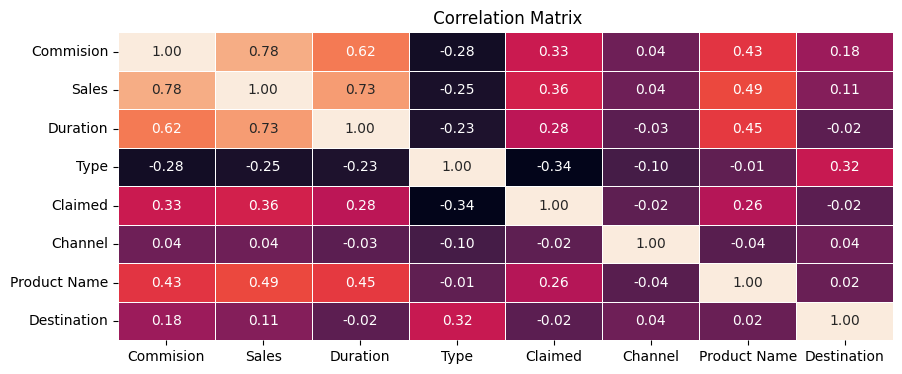

In [19]:
#Correlation heatmap
corr = df1.corr(method='pearson')
fig = plt.subplots(figsize=(10, 4))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, linewidth=0.5)
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')
ax.set_title(' Correlation Matrix')
plt.show()

<Figure size 1000x1000 with 0 Axes>

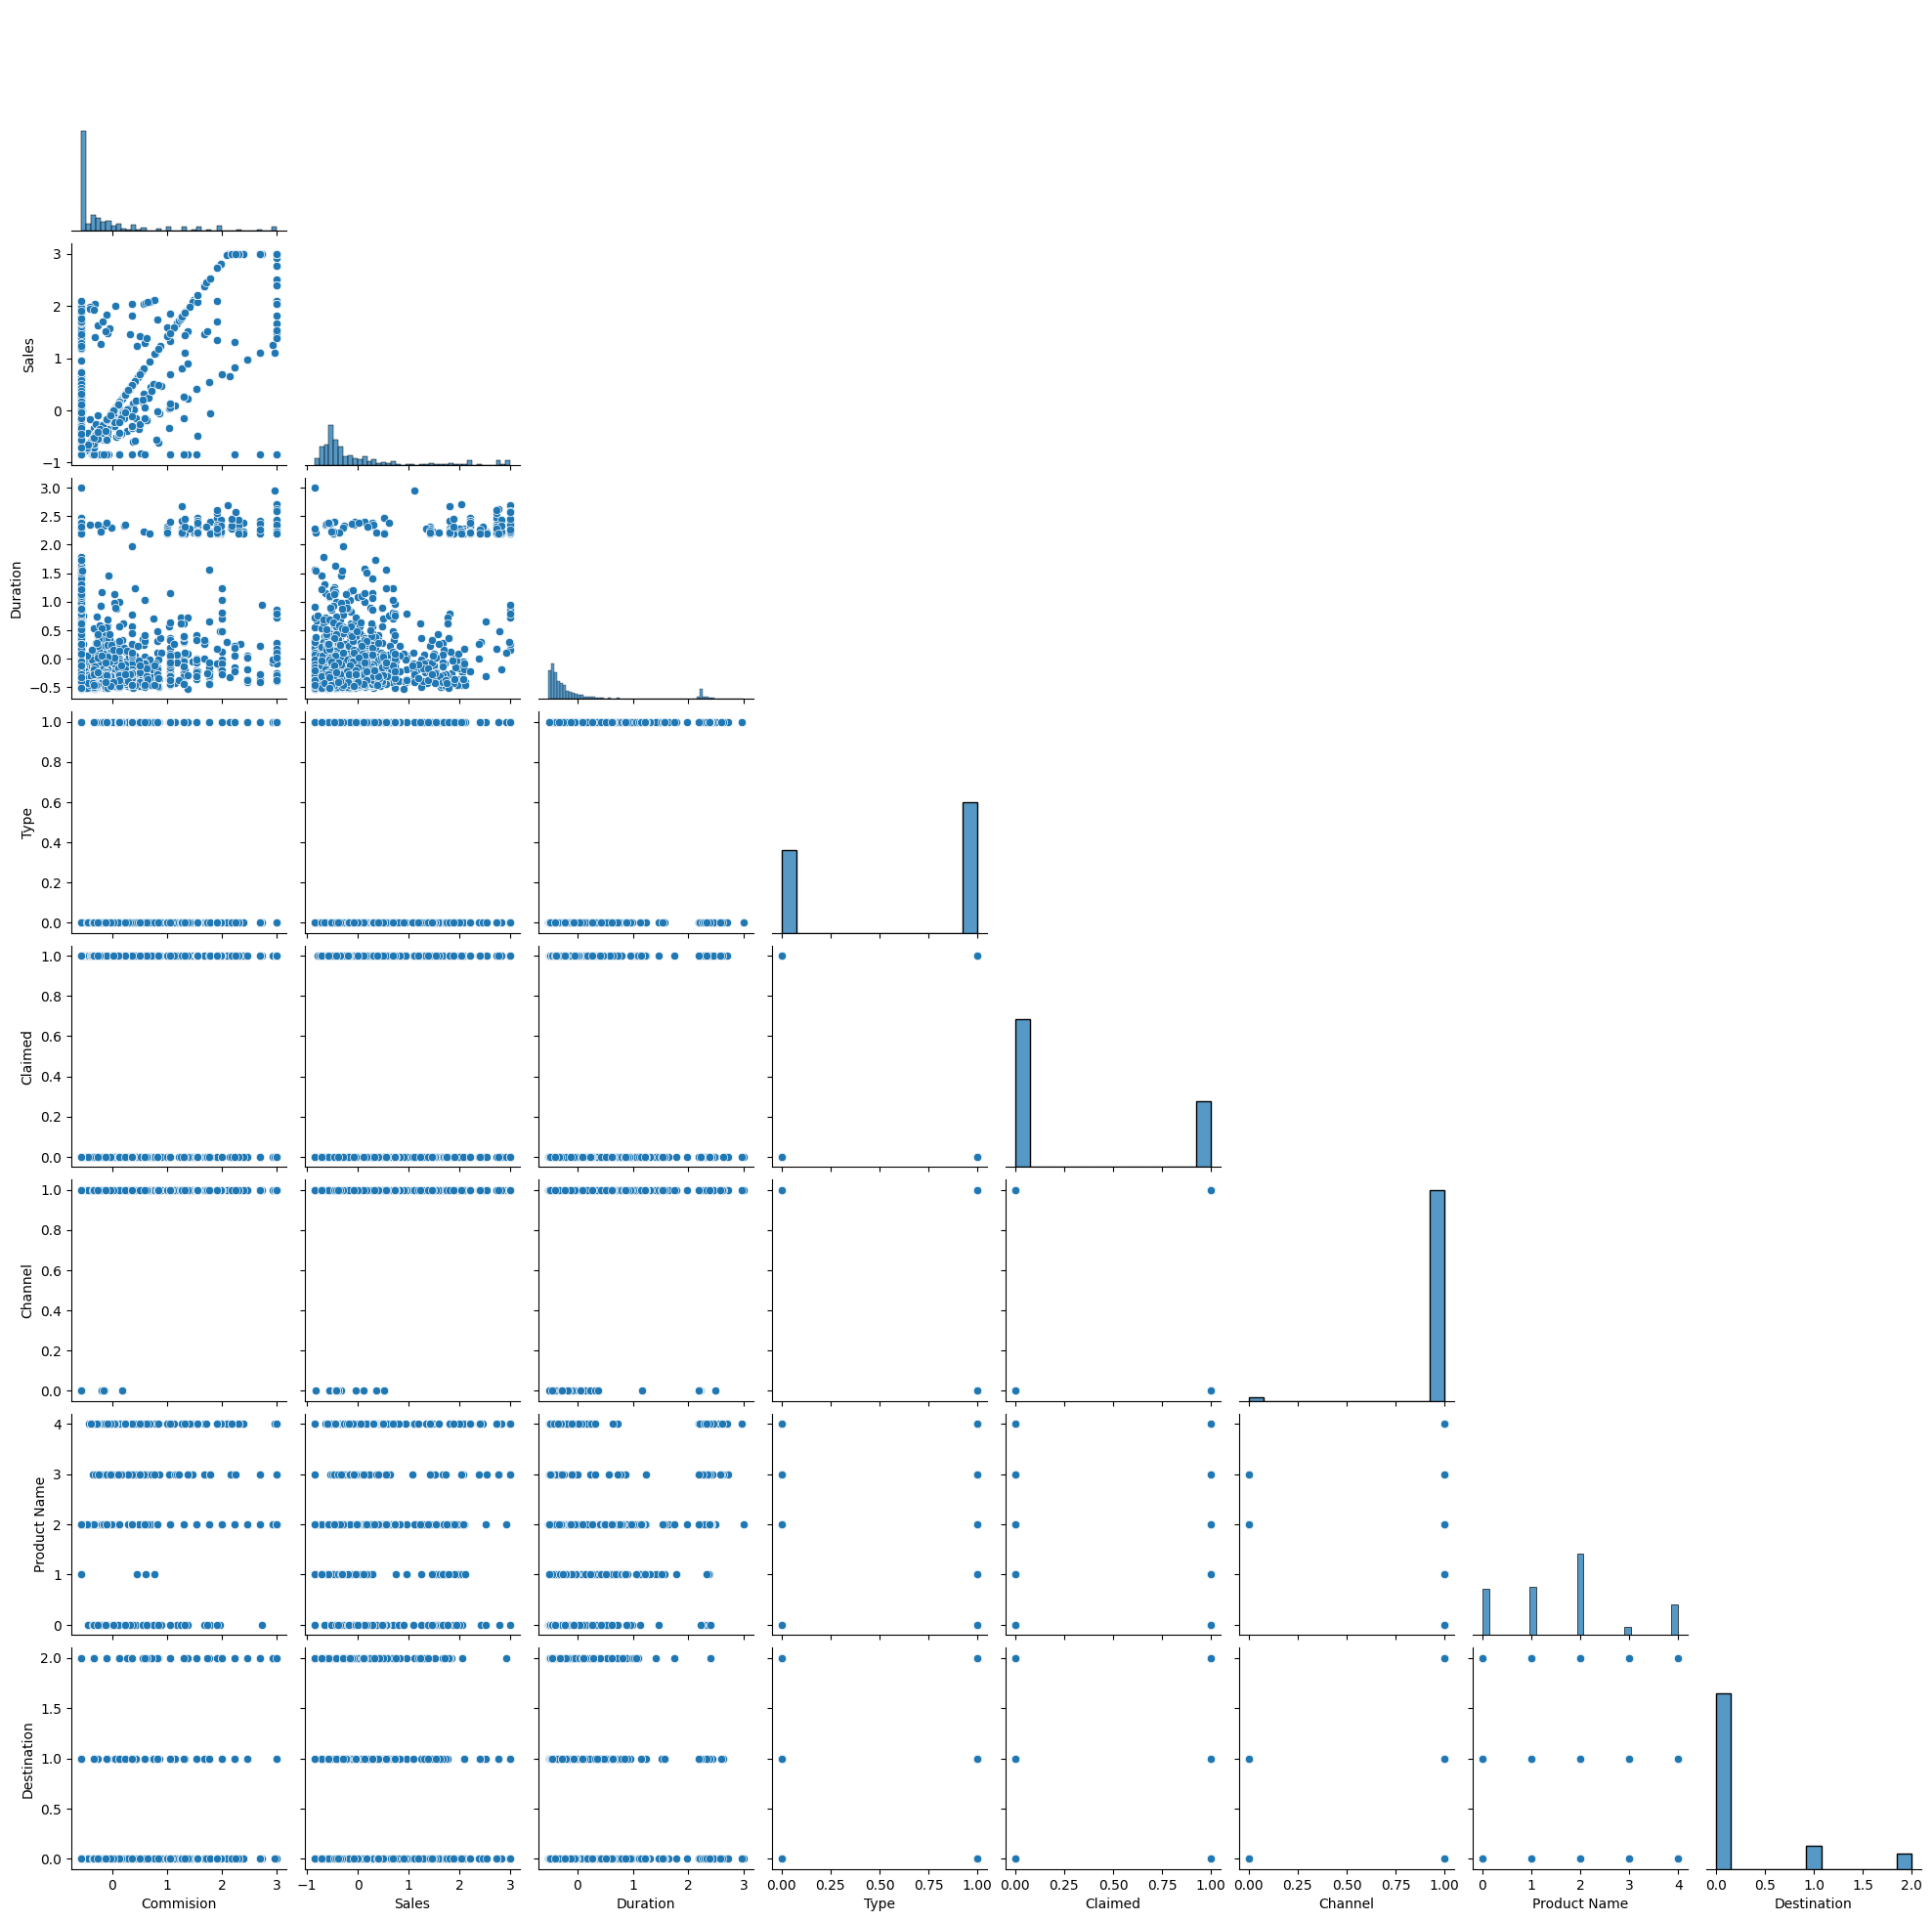

In [20]:
plt.figure(figsize=(10,10))
sns.pairplot(df1, corner=True);

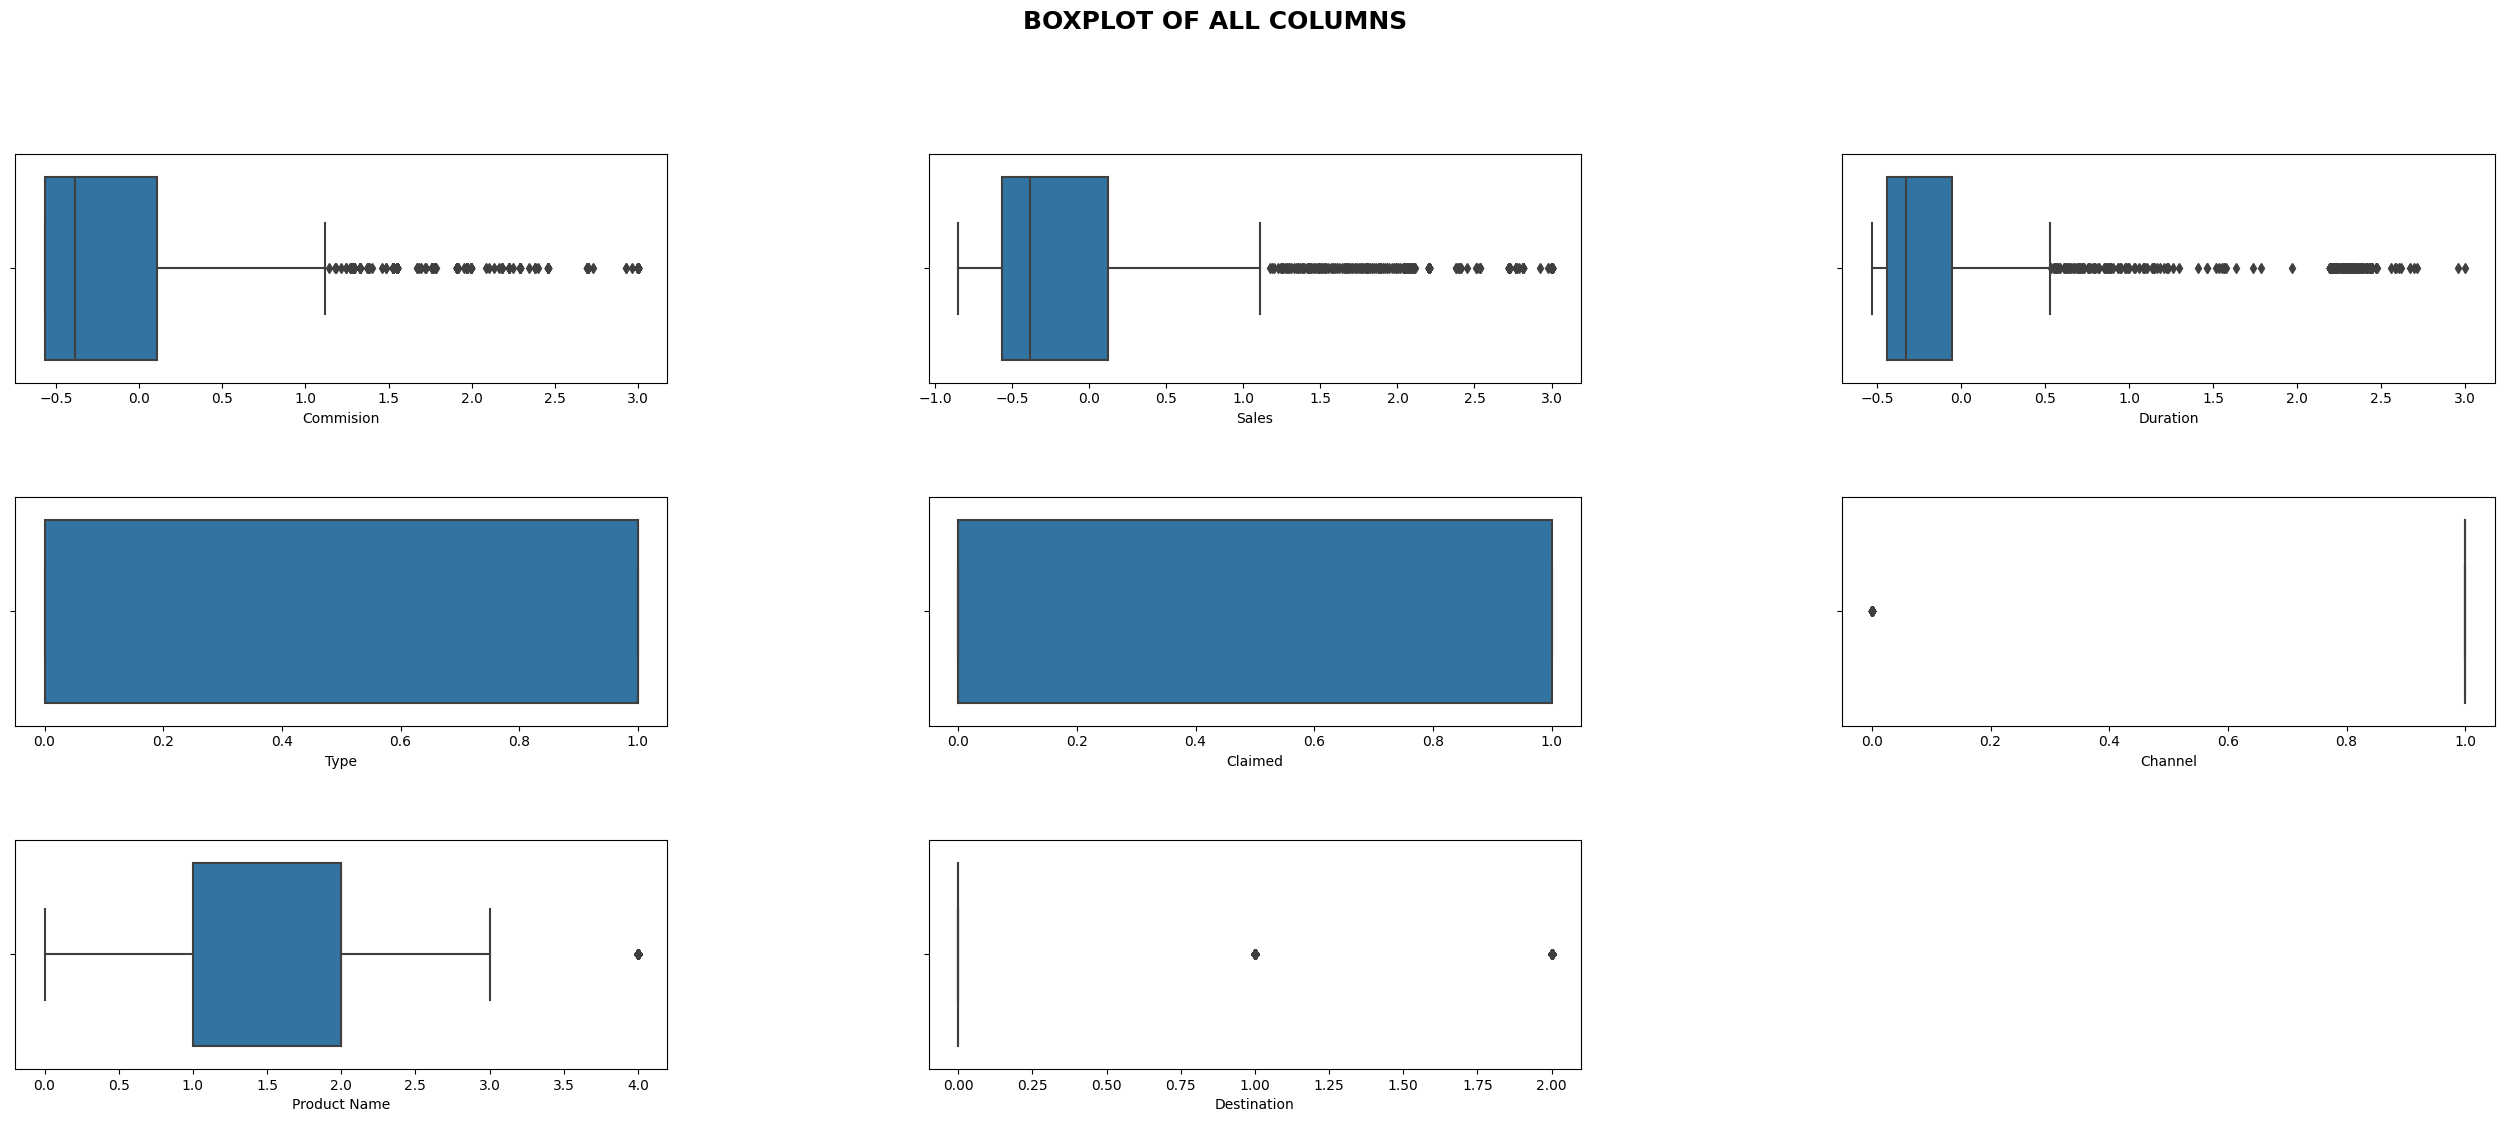

In [21]:
#Outliers in each Columns
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df1):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df1, x=col);

## <b><span style='color:#fa762f'> | </span><span style='color:#28838a'> Model Building </span></b>

In [22]:
X=df1.drop('Claimed',axis=1)
Y=df1.pop('Claimed')

In [23]:
X.shape

(3000, 7)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
X_train,X_test,train_labels,test_labels=train_test_split(X,Y,test_size=0.20,random_state=1)

In [26]:
train_labels.value_counts(normalize=True)

Claimed
0    0.692083
1    0.307917
Name: proportion, dtype: float64

In [27]:
#Defining function to plot confusion matrix and ROC curve
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, accuracy_score
def plot_model_evaluation(model, X_train, train_labels, X_test, test_labels, model_name):
    # Confusion Matrix
    cm_train = confusion_matrix(train_labels, model.predict(X_train))
    cm_test = confusion_matrix(test_labels, model.predict(X_test))
    fig, axes = plt.subplots(1, 2, figsize=(9, 4))
    # Train Data
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
    axes[0].set_title(f"Confusion Matrix ({model_name} - Train Data)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    # Test Data
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[1])
    axes[1].set_title(f"Confusion Matrix ({model_name} - Test Data)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    # Annotate TP, TN, FP, FN
    for i, cm in enumerate([cm_train, cm_test]):
        axes[i].annotate("TP", xy=(1.45, 1.7), fontsize=10, color='black', va='center')
        axes[i].annotate("TN", xy=(0.45, 0.7), fontsize=10, color='white', va='center')
        axes[i].annotate("FP", xy=(1.45, 0.7), fontsize=10, color='black', va='center')
        axes[i].annotate("FN", xy=(0.45, 1.7), fontsize=10, color='black', va='center')
    plt.tight_layout()
    plt.show()
    # ROC curve
    train_labels_predict_prob = model.predict_proba(X_train)
    probs_train = train_labels_predict_prob[:, 1]
    auc_train = roc_auc_score(train_labels, probs_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(train_labels, probs_train)
    test_labels_predict_prob = model.predict_proba(X_test)
    probs_test = test_labels_predict_prob[:, 1]
    auc_test = roc_auc_score(test_labels, probs_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(test_labels, probs_test)
    plt.figure(figsize=(9, 4))
    # ROC curve of training data
    plt.subplot(1, 2, 1)
    plt.title(f'ROC Curve {model_name} Train Data')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr_train, tpr_train, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.text(0.6, 0.3, f'AUC = {round(auc_train, 2)}', fontsize=10)
    # ROC curve of testing data
    plt.subplot(1, 2, 2)
    plt.title(f'ROC Curve {model_name} Test Data')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.plot(fpr_test, tpr_test, marker='.')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.text(0.6, 0.3, f'AUC = {round(auc_test, 2)}', fontsize=10)
    plt.tight_layout()
    plt.show()

## <b><span style='color:#fa762f'> | </span><span style='color:#28838a'> Decision Tree </span></b>

In [28]:
dt_model=dtc(criterion='gini')

In [29]:
dt_model.fit(X_train,train_labels)

DecisionTreeClassifier()

In [30]:
train_char_label = ['No','Yes']

In [31]:
Credit_Tree_File =open('d:\credit_tree.dot','w')

In [32]:
tree.export_graphviz(dt_model,out_file=Credit_Tree_File,feature_names=list(X_train),class_names=train_char_label)

In [33]:
Credit_Tree_File.close()

In [34]:
param_grid={
    'max_depth':[5,7,9],
    'min_samples_split':[15,30,45],
    'min_samples_leaf':[5,10,15],

}

In [35]:
dt_model=dtc()

In [36]:
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=5)

In [37]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45]})

In [38]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15}

In [39]:
reg_dt_model=grid_search.best_estimator_

In [40]:
reg_dt_model.fit(X_train,train_labels)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=15)

In [41]:
Credit_Tree_File =open('d:\credit_tree.dot','w')

In [42]:
tree.export_graphviz(reg_dt_model,out_file=Credit_Tree_File,feature_names=list(X_train),class_names=train_char_label)

In [43]:
Credit_Tree_File.close()

In [44]:
reg_dt_model.feature_importances_

array([0.07696459, 0.18678189, 0.04150516, 0.        , 0.01657592,
       0.67817244, 0.        ])

<BarContainer object of 7 artists>

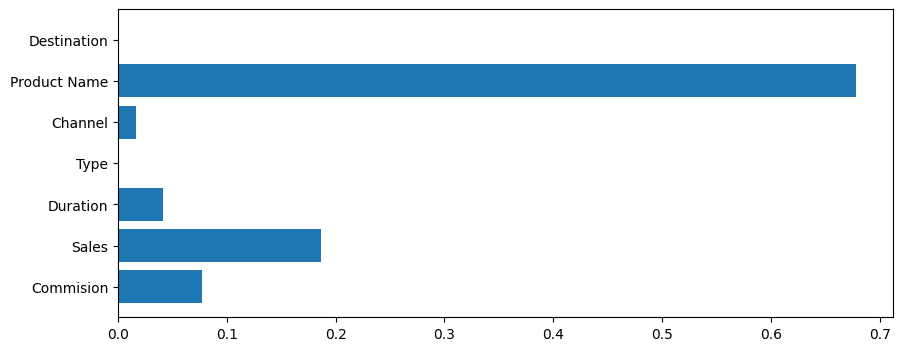

In [45]:
plt.figure(figsize=(10,4))
plt.barh( [col for col in X_train.columns] ,reg_dt_model.feature_importances_)

In [46]:
print(pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

                   Imp
Commision     0.076965
Sales         0.186782
Duration      0.041505
Type          0.000000
Channel       0.016576
Product Name  0.678172
Destination   0.000000


In [47]:
ytrain_predict=reg_dt_model.predict(X_train)
ytest_predict=reg_dt_model.predict(X_test)

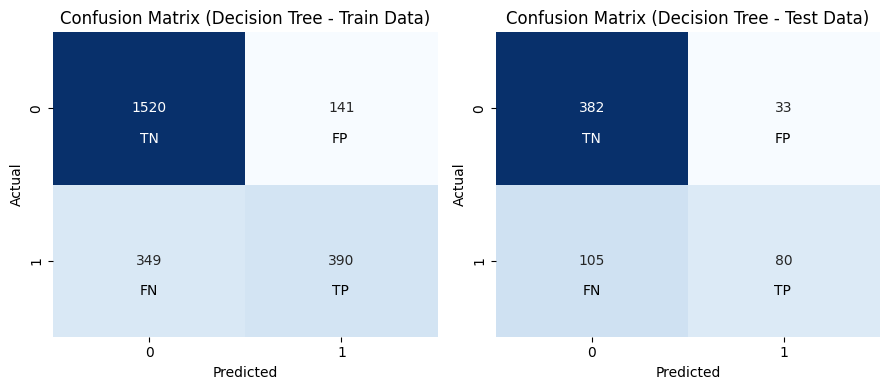

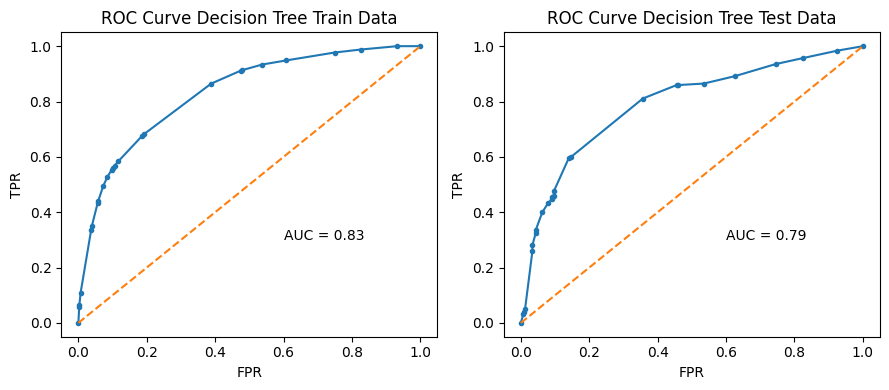

In [48]:
plot_model_evaluation(reg_dt_model, X_train, train_labels, X_test, test_labels, "Decision Tree")

In [49]:
print(classification_report(ytrain_predict,train_labels))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1869
           1       0.53      0.73      0.61       531

    accuracy                           0.80      2400
   macro avg       0.72      0.77      0.74      2400
weighted avg       0.83      0.80      0.81      2400



In [50]:
print(classification_report(ytest_predict,test_labels))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       487
           1       0.43      0.71      0.54       113

    accuracy                           0.77       600
   macro avg       0.68      0.75      0.69       600
weighted avg       0.83      0.77      0.79       600



## <b><span style='color:#fa762f'> | </span><span style='color:#28838a'> Random Forest </span></b>

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfcl=RandomForestClassifier()

In [53]:
param_grid_rfcl ={
    'n_estimators':[50,100],
    'max_features':[4,5],
    'max_depth':[8,10,12],
    'min_samples_split':[15,30,45],
    'min_samples_leaf':[5,10,15]
}

In [54]:
grid_search_rfcl=GridSearchCV(estimator=rfcl,param_grid=param_grid_rfcl,cv=5)

In [55]:
grid_search_rfcl.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12], 'max_features': [4, 5],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [50, 100]})

In [56]:
grid_search_rfcl.best_params_

{'max_depth': 12,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 50}

In [57]:
grid_search_reg_rfcl=grid_search_rfcl.best_estimator_

In [58]:
grid_search_reg_rfcl.fit(X_train,train_labels)

RandomForestClassifier(max_depth=12, max_features=4, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=50)

In [59]:
print(pd.DataFrame(grid_search_reg_rfcl.feature_importances_,columns=['Imp'],index=X_train.columns))

                   Imp
Commision     0.235644
Sales         0.218469
Duration      0.121349
Type          0.089492
Channel       0.001290
Product Name  0.318072
Destination   0.015685


<BarContainer object of 7 artists>

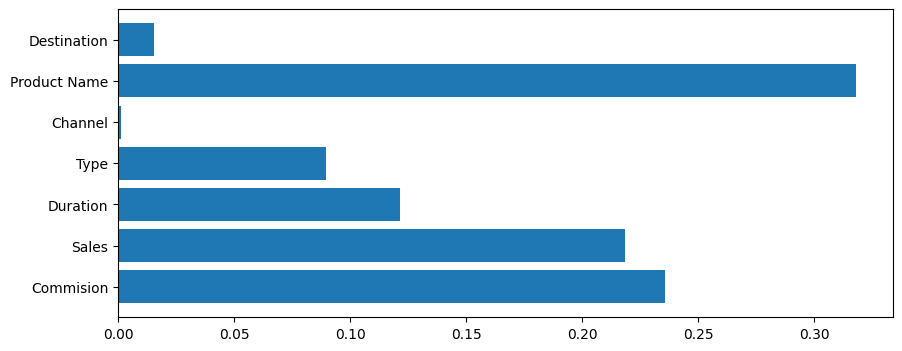

In [60]:
plt.figure(figsize=(10,4))
plt.barh( [col for col in X_train.columns] ,grid_search_reg_rfcl.feature_importances_)

In [61]:
ytrain_rf_predict=grid_search_reg_rfcl.predict(X_train)
ytest_rf_predict=grid_search_reg_rfcl.predict(X_test)

In [62]:
print(classification_report(ytrain_rf_predict,train_labels))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1777
           1       0.62      0.73      0.67       623

    accuracy                           0.81      2400
   macro avg       0.76      0.79      0.77      2400
weighted avg       0.83      0.81      0.82      2400



In [63]:
print(classification_report(ytest_rf_predict,test_labels))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       470
           1       0.49      0.70      0.58       130

    accuracy                           0.78       600
   macro avg       0.70      0.75      0.71       600
weighted avg       0.82      0.78      0.79       600



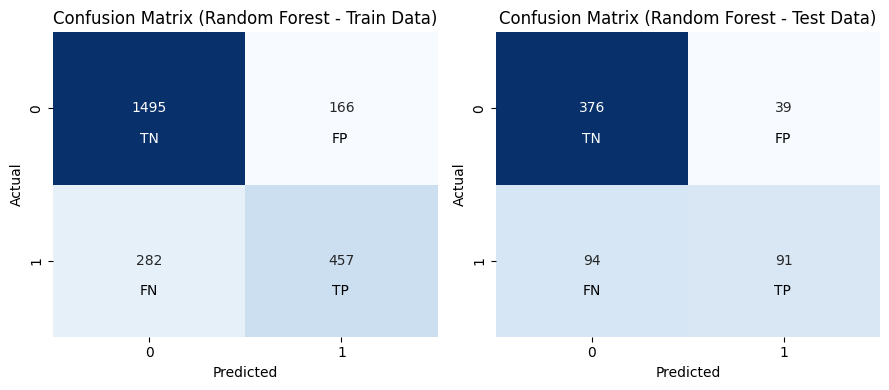

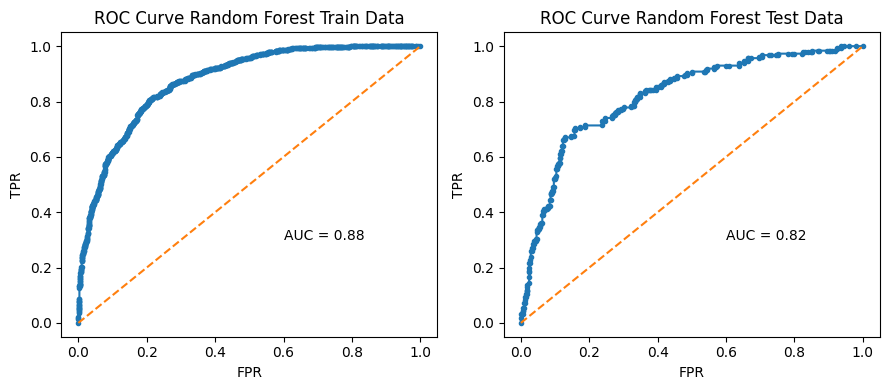

In [64]:
plot_model_evaluation(grid_search_reg_rfcl, X_train, train_labels, X_test, test_labels, "Random Forest")

## <b><span style='color:#fa762f'> | </span><span style='color:#28838a'> ANN </span></b>

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
clf_reg=MLPClassifier()

In [67]:
param_grid_clf={
    'hidden_layer_sizes':[100,200],
    'max_iter':[2000,3000],
    'learning_rate_init':[0.001,0.0001],
    'random_state':[1]
}
grid_search_clf=GridSearchCV(estimator=clf_reg,param_grid=param_grid_clf,cv=5)

In [68]:
grid_search_clf.fit(X_train,train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [100, 200],
                         'learning_rate_init': [0.001, 0.0001],
                         'max_iter': [2000, 3000], 'random_state': [1]})

In [69]:
grid_search_clf.best_estimator_

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=1)

In [70]:
grid_search_clf.best_params_

{'hidden_layer_sizes': 100,
 'learning_rate_init': 0.001,
 'max_iter': 2000,
 'random_state': 1}

In [71]:
clf=grid_search_clf.best_estimator_

In [72]:
clf.fit(X_train,train_labels)

MLPClassifier(hidden_layer_sizes=100, max_iter=2000, random_state=1)

In [73]:
test_clf_pred=clf.predict(X_test)
train_clf_pred=clf.predict(X_train)

In [74]:
print(classification_report(train_clf_pred,train_labels))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1851
           1       0.53      0.71      0.61       549

    accuracy                           0.79      2400
   macro avg       0.72      0.76      0.73      2400
weighted avg       0.82      0.79      0.80      2400



In [75]:
print(classification_report(test_clf_pred,test_labels))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85       488
           1       0.45      0.74      0.56       112

    accuracy                           0.78       600
   macro avg       0.69      0.77      0.71       600
weighted avg       0.84      0.78      0.80       600



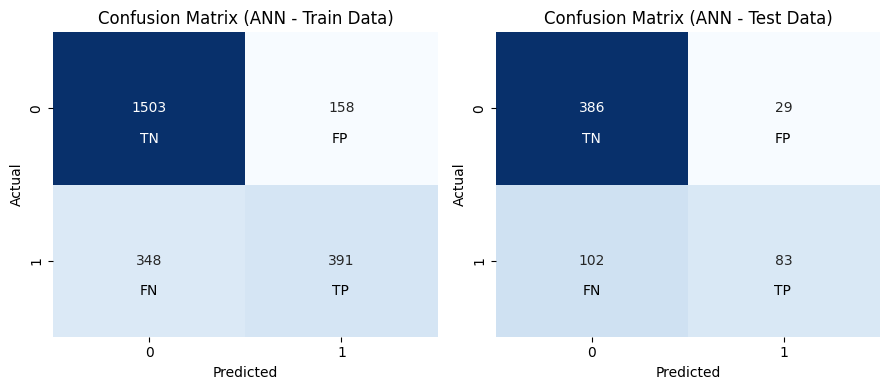

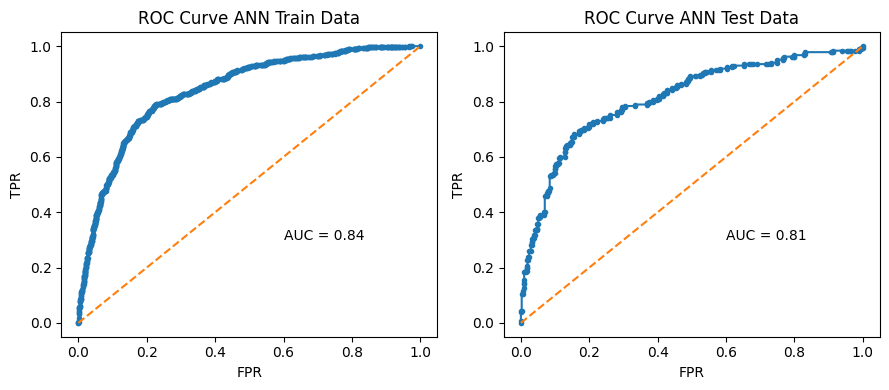

In [76]:
plot_model_evaluation(clf, X_train, train_labels, X_test, test_labels, "ANN")

## <b><span style='color:#fa762f'> | </span><span style='color:#28838a'> Model Comparision </span></b>

In [77]:
# Comparision matrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
models = [("Decision Tree", reg_dt_model), ("Random Forest", grid_search_reg_rfcl), ("ANN", clf)]
metrics = []
for model_name, model in models:
    metrics.append((model_name, accuracy_score(test_labels, model.predict(X_test)),
                    roc_auc_score(test_labels, model.predict(X_test)),
                    recall_score(test_labels,model.predict(X_test)),
                    precision_score(test_labels, model.predict(X_test)),
                    f1_score(test_labels, model.predict(X_test))))
result = pd.DataFrame(metrics, columns=["Model", "Accuracy", "AUC", "Recall", "Precision", "F1 score"])
result

,Model,Accuracy,AUC,Recall,Precision,F1 score
0,Decision Tree,0.770000,0.676457,0.432432,0.707965,0.536913
1,Random Forest,0.778333,0.698958,0.491892,0.700000,0.577778
2,ANN,0.781667,0.689385,0.448649,0.741071,0.558923


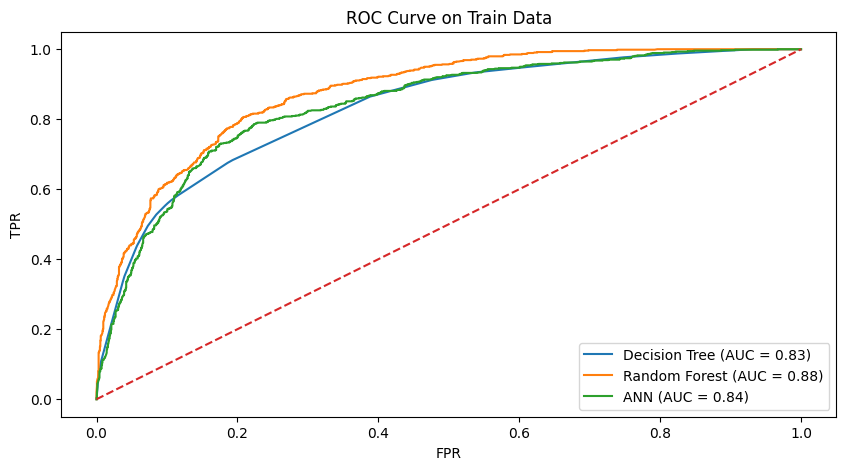

In [78]:
#ROC for Train data
plt.figure(figsize=[10, 5])
plt.title('ROC Curve on Train Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
for model_name, model in models:
    if "fit" in dir(model):
        if "predict_proba" in dir(model):
            pred_prob_train = model.predict_proba(X_train)[:, 1]
        else:
            pred_prob_train = model.decision_function(X_train)
    else:
        if "predict_proba" in dir(model):
            pred_prob_train = model.fit(X_train, train_labels).predict_proba(X_train)[:, 1]
        else:
            pred_prob_train = model.fit(X_train, train_labels).decision_function(X_train)
    fpr_train, tpr_train, thresholds_train = roc_curve(train_labels, pred_prob_train)
    roc_auc = auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, label=f"{model_name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()

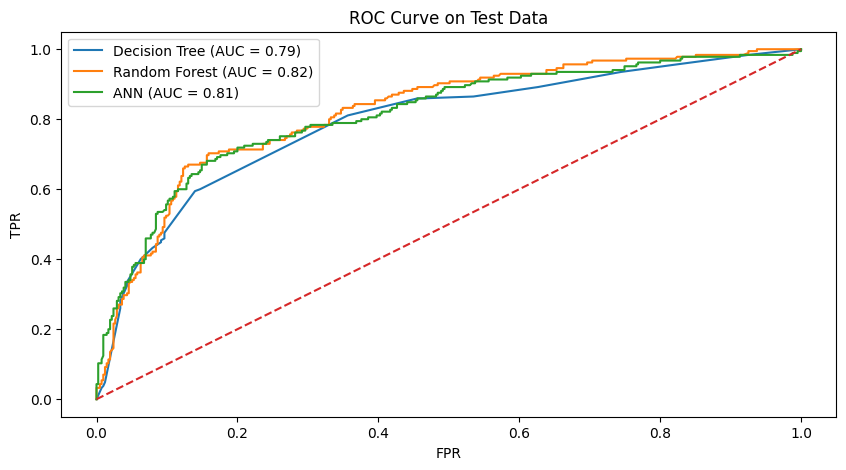

In [79]:
#ROC for Test data
plt.figure(figsize=[10, 5])
plt.title('ROC Curve on Test Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
for model_name, model in models:
    if "fit" in dir(model):
        if "predict_proba" in dir(model):
            pred_prob_test = model.predict_proba(X_test)[:, 1]
        else:
            pred_prob_test = model.decision_function(X_test)
    else:
        if "predict_proba" in dir(model):
            pred_prob_test = model.fit(X_train, train_labels).predict_proba(X_test)[:, 1]
        else:
            pred_prob_test = model.fit(X_train, train_labels).decision_function(X_test)
    fpr_test, tpr_test, thresholds_test = roc_curve(test_labels, pred_prob_test)
    roc_auc = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f"{model_name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()
plt.show()

## <b><span style='color:#fa762f'> | </span><span style='color:#28838a'> Conclusion </span></b>

<div style="border-radius:10px; padding: 15px; background-color: #e6effa; font-size:120%; text-align:left">
    
    
- The RF model has better accuracy, precsion, recall, f1 score better than other two CART & NN
- The second best model is Neural Networks. Model evaluation parameters for NN is quite near to RF.
- _Other models & ensemble techniques can be used to improve the model performance as these models are not good enough_
    
    
 
 
*   As per the data 90% of insurance is done by online channel. Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits.
* Almost all the offline business has a claimed associated.
* Based on the model we are getting 80% accuracy, they need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern.
* More sales happen via Agency than Airlines. The trend shows the claim are processed more at Airline.
* The following points needs to be taken care :  Reduce claims cycle time, Increase customer satisfaction, Combat fraud , Optimize claims recovery, Reduce claim handling costs

<a id="toc"></a>

<a href="#toc" style="background-color: #28838a; color: #ffffff; padding: 7px 10px; text-decoration: none; border-radius: 50px;">Back to top</a><a id="toc"></a>

---
<p style="font-size:20px; font-family:verdana; line-height: 1.7em; color:#28838a;">
    <em>Appreciate your time exploring my work. If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook. Happy Learning!</em>
</p>


<center><img src='https://i.pinimg.com/originals/78/64/9e/78649e30de4bd74262691f489800ebb9.gif' 
     height=100px width=500px /></center>
    
